## Interfaz web

In [1]:
#@markdown # Conectar a Google Drive
#@markdown Si estás reutilizando el cuaderno y ya has descargado todo ÚNICAMENTE tienes que ejecutar la celda de "Requirements" y "Lanzar Interfaz Web"
from google.colab import drive
from IPython.display import clear_output
import ipywidgets as widgets
import os

def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)
Shared_Drive = ""
mainpth="MyDrive"

print("[0;33mConnecting...")
drive.mount('/content/gdrive')

Connecting...
Mounted at /content/gdrive


In [2]:
#@markdown # Instalar repositorio AUTOMATIC1111
from IPython.utils import capture
from IPython.display import clear_output
from subprocess import getoutput
import ipywidgets as widgets
import sys
import fileinput
import os
import time

Usar_Ultimo_Commit = False #@param {type:"boolean"}

if not os.path.exists("/content/gdrive"):
  print('[1;31mGdrive not connected, using colab storage ...')
  time.sleep(4)
  mainpth="MyDrive"
  !mkdir -p /content/gdrive/$mainpth
  Shared_Drive=""

with capture.capture_output() as cap:
  def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)
  fgitclone = "git clone --depth 1"
  %mkdir -p /content/gdrive/$mainpth/sd
  %cd /content/gdrive/$mainpth/sd
  !git clone -q --branch master https://github.com/AUTOMATIC1111/stable-diffusion-webui
  !mkdir -p /content/gdrive/$mainpth/sd/stable-diffusion-webui/cache/
  os.environ['TRANSFORMERS_CACHE']=f"/content/gdrive/{mainpth}/sd/stable-diffusion-webui/cache"

with capture.capture_output() as cap:
  %cd /content/gdrive/$mainpth/sd/stable-diffusion-webui/
  !git reset --hard
  time.sleep(1)
  !rm webui.sh
  !git pull
  if Usar_Ultimo_Commit:
    !git fetch --unshallow
    !git checkout a9eab236d7e8afa4d6205127904a385b2c43bb24
    !pip install gradio==3.16.2 --no-deps -qq
  else:
    !pip install gradio==3.23 --no-deps -qq
clear_output()
inf('\u2714 Done','success', '50px')

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [4]:
#@markdown # Requirements
from IPython.utils import capture
from IPython.display import clear_output
from subprocess import getoutput
import ipywidgets as widgets
import sys
import fileinput
import os
import time

Usar_Ultimo_Commit = False
print('[1;32mInstalling requirements...')

with capture.capture_output() as cap:
  %cd /content/ 
  !wget -q -i https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dependencies/A1111.txt
  !dpkg -i *.deb
  if not os.path.exists('/content/gdrive/'+mainpth+'/sd/stablediffusion'):
    !tar -C /content/gdrive/$mainpth --zstd -xf sd_rep.tar.zst
  !tar -C / --zstd -xf gcolabdeps.tar.zst
  !rm *.deb | rm *.zst | rm *.txt
  %env LD_PRELOAD=libtcmalloc.so
  os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
  os.environ['PYTHONWARNINGS'] = 'ignore'
  if Usar_Ultimo_Commit:
    !pip install gradio==3.16.2 --no-deps -qq
  else:
    !pip install gradio==3.23 --no-deps -qq

clear_output()
inf('\u2714 Done','success', '50px')

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [4]:
#@markdown # Descarga del modelo
Model_Version = "1.5" #@param [ "1.5", "v1.5 Inpainting ", "V2.1-512px", "V2.1-768px"]

Re_descargar_modelo_original = False #@param {type:"boolean"}

def rmv():
  !wget -q -O /content/gdrive/$mainpth/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/precompiled/README.md
  !mv /content/gdrive/$mainpth/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt /content/gdrive/$mainpth/sd/stable-diffusion-webui/models/Stable-diffusion/trashfile.f
  time.sleep(2)
  !rm /content/gdrive/$mainpth/sd/stable-diffusion-webui/models/Stable-diffusion/trashfile.f
  clear_output()

if Re_descargar_modelo_original:
  with capture.capture_output() as cap:
    rmv()

#@markdown O si tienes algún modelo ya entrenado
Path_to_MODEL = "" #@param {type:"string"}
#@markdown - Introducir la ruta completa del modelo entrenado
MODEL_LINK = ""

safetensors = False
Use_temp_storage = False



def newmdl():

    if not os.path.exists('/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'):
      %cd /content/
      clear_output()
      !git init
      !git lfs install --system --skip-repo
      !$fgitclone --branch fp16 "https://huggingface.co/runwayml/stable-diffusion-v1-5"
      if os.path.exists('/content/stable-diffusion-v1-5/unet/diffusion_pytorch_model.bin'):
        !wget -q -O stable-diffusion-v1-5/vae/diffusion_pytorch_model.bin https://huggingface.co/stabilityai/sd-vae-ft-mse/resolve/main/diffusion_pytorch_model.bin
        !wget -q -O convertosd.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertosd.py
        !sed -i '201s@.*@    model_path = "/content/stable-diffusion-v1-5"@' /content/convertosd.py
        !sed -i '202s@.*@    checkpoint_path= "/content/gdrive/{mainpth}/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt"@' /content/convertosd.py
        clear_output()       
        !python /content/convertosd.py
        !rm /content/convertosd.py
        if os.path.exists('/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'):
          model='/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'
          clear_output()
          inf('\u2714 Done','success', '50px')
        else:
          inf('\u2718 Something went wrong, try again','danger', "250px")
      else:
        inf('\u2718 Something went wrong','danger', "200px")

    else:
      model='/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'
      clear_output()
      inf('\u2714 Model already exists, check the box "Redownload_the_original_model" to redownload/download the V1.5','primary', '700px')

    if os.path.exists('/content/.git'):
      !rm -r /content/.git

    if os.path.exists('/content/stable-diffusion-v1-5'):
      !rm -r /content/stable-diffusion-v1-5

    return model

def V2():

    if not os.path.exists('/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'):
      %cd /content/
      clear_output()
      !mkdir "/content/stable-diffusion-V2"
      %cd "/content/stable-diffusion-V2"
      !git init
      !git lfs install --system --skip-repo
      if Model_Version == "V2.1-768px":
        !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1"
      elif Model_Version == "V2.1-512px":
        !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1-base"
      !git config core.sparsecheckout true
      !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
      !git pull origin fp16
      %cd /content
      !wget -O convertosdv2.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertosdv2.py
      clear_output()
      !python /content/convertosdv2.py --fp16 /content/stable-diffusion-V2 /content/gdrive/$mainpth/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt
      !rm /content/convertosdv2.py
      if os.path.exists('/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'):
        model='/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'
        clear_output()
        inf('\u2714 Done','success', '50px')
      else:
        inf('\u2718 Something went wrong, try again','danger', "250px")

    else:
      model='/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'
      clear_output()
      inf('\u2714 Model already exists, check the box "Redownload_the_original_model" to redownload/download the V2','primary', '700px')

    if os.path.exists('/content/.git'):
      !rm -r /content/.git
      !rm -r /content/convertosdv2.py
    if os.path.exists('/content/stable-diffusion-V2'):
      !rm -r /content/stable-diffusion-V2

    return model

def inpmdl():

    if not os.path.exists('/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt'):
      %cd /content/
      clear_output()
      !git init
      !git lfs install --system --skip-repo
      !$fgitclone --branch fp16 "https://huggingface.co/runwayml/stable-diffusion-inpainting"
      if os.path.exists('/content/stable-diffusion-inpainting'):
        !$fgitclone "https://huggingface.co/stabilityai/sd-vae-ft-mse"
        !rm -r /content/stable-diffusion-inpainting/vae
        !mv /content/sd-vae-ft-mse /content/stable-diffusion-inpainting/vae        
        !wget -O convertosd.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertosd.py
        !sed -i '201s@.*@    model_path = "/content/stable-diffusion-inpainting"@' /content/convertosd.py
        !sed -i '202s@.*@    checkpoint_path= "/content/gdrive/{mainpth}/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt"@' /content/convertosd.py
        clear_output()       
        !python /content/convertosd.py
        !rm /content/convertosd.py
        if os.path.exists('/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt'):
          model='/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt'
          clear_output()
          inf('\u2714 Done','success', '50px')
        else:
          inf('\u2718 Something went wrong, try again','danger', "250px")
      else:
        inf('\u2718 Something went wrong','danger', "200px")


    else:
      model='/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt'
      clear_output()
      inf('\u2714 inpainting model already exists','primary', '250px')

    if os.path.exists('/content/.git'):
      !rm -r /content/.git

    if os.path.exists('/content/stable-diffusion-inpainting'):
      !rm -r /content/stable-diffusion-inpainting

    return model

if (Path_to_MODEL !=''):
  if os.path.exists(str(Path_to_MODEL)):
    inf('\u2714 Using the trained model.','success', '200px')

  else:
      while not os.path.exists(str(Path_to_MODEL)):
        inf('\u2718 Wrong path, use the colab file explorer to copy the path : ','danger', "400px")
        Path_to_MODEL=input()
      if os.path.exists(str(Path_to_MODEL)):
        inf('\u2714 Using the trained model.','success', '200px')

  model=Path_to_MODEL

elif MODEL_LINK != "":
  gdrv='/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/models/Stable-diffusion'
  tmp="/content"
  pth=tmp if Use_temp_storage else gdrv
  %cd $pth
  clear_output()
  if not safetensors:
    modelname="model.ckpt"
  else:
    modelname="model.safetensors"
  !gdown --fuzzy -O $modelname "$MODEL_LINK"
  if os.path.exists(f'{pth}/{modelname}') and os.path.getsize(f'{pth}/{modelname}') > 1810671599:    
      model=f'{pth}/{modelname}'
      clear_output()
      inf('\u2714 Model downloaded, using the trained model.','success', '350px')
  else:
    if Use_temp_storage:
      !rm $pth/$modelname
    else:
      rmv()
    inf('\u2718 Wrong link, check that the link is valid','danger', "300px")


elif Model_Version=="1.5":
  model=newmdl()

elif Model_Version=="V2.1-512px" or Model_Version=="V2.1-768px":
  model=V2()

else:
   model=inpmdl()

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [5]:
#@markdown # ControlNet
from torch.hub import download_url_to_file
from urllib.parse import urlparse
import re

Model = "All" #@param [ "None", "All", "Canny", "Depth", "HED", "MLSD", "Normal", "OpenPose", "Scribble", "Seg", "T2iadapter_Models"]

v2_Model = "All" #@param [ "None", "All", "Canny", "Depth", "HED", "OpenPose", "Scribble"]

#@markdown - Descarga/actualización de la extensión ControlNet y sus modelos

def download(url, model_dir):

    filename = os.path.basename(urlparse(url).path)
    pth = os.path.abspath(os.path.join(model_dir, filename))
    if not os.path.exists(pth):
        print('Downloading: '+os.path.basename(url))
        download_url_to_file(url, pth, hash_prefix=None, progress=True)
    else:
      print(f"[1;32mThe model {filename} already exists[0m")

Canny='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_canny-fp16.safetensors'
Depth='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_depth-fp16.safetensors'
HED='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_hed-fp16.safetensors'
MLSD='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_mlsd-fp16.safetensors'
Normal='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_normal-fp16.safetensors'
OpenPose='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_openpose-fp16.safetensors'
Scribble='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_scribble-fp16.safetensors'
Seg='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_seg-fp16.safetensors'

with capture.capture_output() as cap:
  %cd /content/gdrive/$mainpth/sd/stable-diffusion-webui/extensions
  if not os.path.exists("sd-webui-controlnet"):
    !git clone https://github.com/Mikubill/sd-webui-controlnet.git
    %cd /content
  else:
    %cd sd-webui-controlnet
    !git reset --hard
    !git pull
    %cd /content

mdldir='/content/gdrive/'+mainpth+'/sd/stable-diffusion-webui/extensions/sd-webui-controlnet/models'
for filename in os.listdir(mdldir):
  if "_sd14v1" in filename:
    renamed = re.sub("_sd14v1", "-fp16", filename)
    os.rename(os.path.join(mdldir, filename), os.path.join(mdldir, renamed))

!wget -q -O CN_models.txt https://github.com/TheLastBen/fast-stable-diffusion/raw/main/AUTOMATIC1111_files/CN_models.txt
!wget -q -O CN_models_v2.txt https://github.com/TheLastBen/fast-stable-diffusion/raw/main/AUTOMATIC1111_files/CN_models_v2.txt

with open("CN_models.txt", 'r') as f:
  mdllnk = f.read().splitlines()
with open("CN_models_v2.txt", 'r') as d:
  mdllnk_v2 = d.read().splitlines()

!rm CN_models.txt CN_models_v2.txt

if Model == "All": 
  for lnk in mdllnk:
      download(lnk, mdldir)
  clear_output()

elif Model == "T2iadapter_Models":
  mdllnk=list(filter(lambda x: 't2i' in x, mdllnk))
  for lnk in mdllnk:
      download(lnk, mdldir)
  clear_output()

elif Model == "None":
    pass
    clear_output()

else:
  download(globals()[Model], mdldir)
  clear_output()

Canny='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/canny-sd21-safe.safetensors'
Depth='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/depth-sd21-safe.safetensors'
HED='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/hed-sd21-safe.safetensors'
OpenPose='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/openpose-sd21-safe.safetensors'
Scribble='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/scribble-sd21-safe.safetensors'

if v2_Model == "All":
  for lnk_v2 in mdllnk_v2:
      download(lnk_v2, mdldir)
  clear_output()
  inf('\u2714 Done','success', '50px')

elif v2_Model == "None":
    pass
    clear_output()
    inf('\u2714 Done','success', '50px')

else:
  download(globals()[v2_Model], mdldir)
  clear_output()
  inf('\u2714 Done','success', '50px')

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [22]:
#@markdown # Lanzar interfaz web
from IPython.utils import capture
import time
import sys
import fileinput
#from pyngrok import ngrok, conf

auth=""


with capture.capture_output() as cap:
  %cd /content/gdrive/$mainpth/sd/stable-diffusion-webui/modules/

  #if Usar_Ultimo_Commit:
  #  !wget -q -O paths.py https://github.com/TheLastBen/fast-stable-diffusion/raw/5632d2ef7fffd940976538d270854ec4faf26855/AUTOMATIC1111_files/paths.py
  #  !wget -q -O extras.py https://github.com/AUTOMATIC1111/stable-diffusion-webui/raw/a9eab236d7e8afa4d6205127904a385b2c43bb24/modules/extras.py
  #  !wget -q -O sd_models.py https://github.com/AUTOMATIC1111/stable-diffusion-webui/raw/a9eab236d7e8afa4d6205127904a385b2c43bb24/modules/sd_models.py
  # !wget -q -O /usr/local/lib/python3.9/dist-packages/gradio/blocks.py https://github.com/TheLastBen/fast-stable-diffusion/raw/7ff88eaa1fb4997bacd9845bd487f9a14335d625/AUTOMATIC1111_files/blocks.py 
  #else:
  !wget -q -O paths.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/AUTOMATIC1111_files/paths.py
  !wget -q -O extras.py https://raw.githubusercontent.com/AUTOMATIC1111/stable-diffusion-webui/master/modules/extras.py
  !wget -q -O sd_models.py https://raw.githubusercontent.com/AUTOMATIC1111/stable-diffusion-webui/master/modules/sd_models.py
  !wget -q -O /usr/local/lib/python3.9/dist-packages/gradio/blocks.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/AUTOMATIC1111_files/blocks.py
  %cd /content/gdrive/$mainpth/sd/stable-diffusion-webui/

  !sed -i "s@os.path.splitext(checkpoint_file)@os.path.splitext(checkpoint_file); map_location='cuda'@" /content/gdrive/$mainpth/sd/stable-diffusion-webui/modules/sd_models.py
  !sed -i 's@ui.create_ui().*@ui.create_ui();shared.demo.queue(concurrency_count=999999,status_update_rate=0.1)@' /content/gdrive/$mainpth/sd/stable-diffusion-webui/webui.py
  !sed -i "s@map_location='cpu'@map_location='cuda'@" /content/gdrive/$mainpth/sd/stable-diffusion-webui/modules/extras.py
  !sed -i 's@/content/gdrive/MyDrive/sd/stablediffusion@/content/gdrive/{mainpth}/sd/stablediffusion@' /content/gdrive/$mainpth/sd/stable-diffusion-webui/modules/paths.py
  !sed -i 's@print(\"No module.*@@' /content/gdrive/$mainpth/sd/stablediffusion/ldm/modules/diffusionmodules/model.py
  !sed -i 's@\"quicksettings\": OptionInfo(.*@"quicksettings": OptionInfo("sd_model_checkpoint,  sd_vae, CLIP_stop_at_last_layers, inpainting_mask_weight, initial_noise_multiplier", "Quicksettings list"),@' /content/gdrive/$mainpth/sd/stable-diffusion-webui/modules/shared.py

share='--share'

try:
  model
  if os.path.isfile(model):
    !python /content/gdrive/$mainpth/sd/stable-diffusion-webui/webui.py $share --api --disable-safe-unpickle --enable-insecure-extension-access --no-download-sd-model --no-half-vae  --ckpt "$model" --opt-sdp-attention $auth --disable-console-progressbars 
  else:
    !python /content/gdrive/$mainpth/sd/stable-diffusion-webui/webui.py $share --api --disable-safe-unpickle --enable-insecure-extension-access --no-download-sd-model --no-half-vae  --ckpt-dir "$model" --opt-sdp-attention $auth --disable-console-progressbars 
except:
   !python /content/gdrive/$mainpth/sd/stable-diffusion-webui/webui.py $share --api --disable-safe-unpickle --enable-insecure-extension-access --no-download-sd-model --no-half-vae --opt-sdp-attention $auth --disable-console-progressbars 

ControlNet v1.1.107
ControlNet v1.1.107
Loading weights [4c86efd062] from /content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt
Creating model from config: /content/gdrive/MyDrive/sd/stable-diffusion-webui/configs/v1-inference.yaml
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Applying scaled dot product cross attention optimization.
Textual inversion embeddings loaded(0): 
Model loaded in 43.7s (load weights from disk: 35.8s, find config: 0.1s, load config: 0.3s, create model: 2.9s, apply weights to model: 2.8s, apply half(): 0.9s, move model to device: 0.7s).
Running on public URL: https://c065ceb42a78058124.gradio.live
✔ Connected
Startup time: 198.9s (import torch: 6.7s, import gradio: 2.0s, import ldm: 2.3s, other imports: 69.8s, list SD models: 1.7s, setup codeformer: 12.2s, list builtin upscalers: 1.5s, load scripts: 43.8s, load SD checkpoint: 43.7s, extra networks: 0.3s, create ui: 10.5s, gradio launch: 4.4s

## Ejemplo utilización desde código

In [6]:
#@markdown # Instalar requirements
!pip install diffusers transformers accelerate scipy safetensors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import matplotlib.pyplot as plt
import torch

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Fetching 13 files  0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/modeling_utils.py:386: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(checkpoint_file, framework="pt") as f:
/usr/local/lib/python3.9/dist-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/usr/local/lib/python3.9/dist-packages/torch/storage.py:899: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This sh

  0%|          | 0/50 [00:00<?, ?it/s]

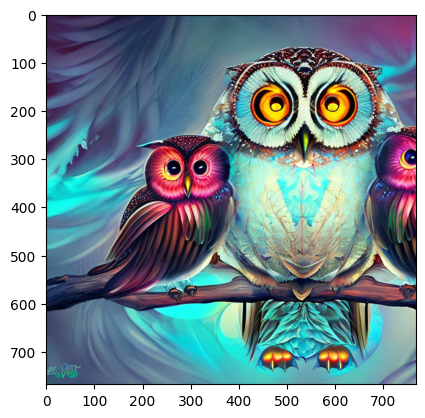

In [8]:
prompt = "symmetry!! product render poster vivid colors divine proportion owl, ice and snow, glowing fog intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration,"
image = pipe(prompt).images[0]

plt.imshow(image)
#image.save("nombre_imagen.png")

## Notebooks para reentrenamiento

| Notebook Name | Description | Link |
| --- | --- | --- |
| [Kohya LoRA Dreambooth](https://github.com/Linaqruf/kohya-trainer/blob/main/kohya-LoRA-dreambooth.ipynb) | LoRA Training (Dreambooth method) | [![](https://img.shields.io/static/v1?message=Open%20in%20Colab&logo=googlecolab&labelColor=5c5c5c&color=0f80c1&label=%20&style=for-the-badge)](https://colab.research.google.com/github/Linaqruf/kohya-trainer/blob/main/kohya-LoRA-dreambooth.ipynb) |
| [Kohya LoRA Fine-Tuning](https://github.com/Linaqruf/kohya-trainer/blob/main/kohya-LoRA-finetuner.ipynb) | LoRA Training (Fine-tune method) | [![](https://img.shields.io/static/v1?message=Open%20in%20Colab&logo=googlecolab&labelColor=5c5c5c&color=0f80c1&label=%20&style=for-the-badge)](https://colab.research.google.com/github/Linaqruf/kohya-trainer/blob/main/kohya-LoRA-finetuner.ipynb) |
| [Kohya Trainer](https://github.com/Linaqruf/kohya-trainer/blob/main/kohya-trainer.ipynb) | Native Training | [![](https://img.shields.io/static/v1?message=Open%20in%20Colab&logo=googlecolab&labelColor=5c5c5c&color=0f80c1&label=%20&style=for-the-badge)](https://colab.research.google.com/github/Linaqruf/kohya-trainer/blob/main/kohya-trainer.ipynb) |
| [Kohya Dreambooth](https://github.com/Linaqruf/kohya-trainer/blob/main/kohya-dreambooth.ipynb) | Dreambooth Training | [![](https://img.shields.io/static/v1?message=Open%20in%20Colab&logo=googlecolab&labelColor=5c5c5c&color=0f80c1&label=%20&style=for-the-badge)](https://colab.research.google.com/github/Linaqruf/kohya-trainer/blob/main/kohya-dreambooth.ipynb) |